Assignment 7<br>
Data Loading, Storage and File Formats
Problem Statement: Analyzing Sales Data from Multiple File Formats
Dataset: Sales data in multiple file formats (e.g., CSV, Excel, JSON)
Description: The goal is to load and analyze sales data from different file formats, including CSV, Excel, and JSON, and perform data cleaning, transformation, and analysis on the dataset.
Tasks to Perform:
Obtain sales data files in various formats, such as CSV, Excel, and JSON.
1. Load the sales data from each file format into the appropriate data structures or dataframes.
2. Explore the structure and content of the loaded data, identifying any inconsistencies, missing values, or data quality issues.
3. Perform data cleaning operations, such as handling missing values, removing duplicates, or correcting inconsistencies.
4. Convert the data into a unified format, such as a common dataframe or data structure, to enable seamless analysis.

In [ ]:
import pandas as pd
import numpy as np
import io

# --- 1. Simulate File Data ---
# In a real-world scenario, you would replace the io.StringIO/io.BytesIO
# objects with your actual file paths (e.g., 'sales.csv', 'data.xlsx')

# Sample CSV data
csv_data = """Date,ProductID,Amount,Region
2024-01-01,P100,150,North
2024-01-02,P101,200,South
2024-01-03,P100,150,North
2024-01-04,P102,500,West
"""

# Sample Excel data
excel_data = {
    'OrderDate': ['2024-01-05', '2024-01-06', '2024-01-07'],
    'ItemCode': ['P103', 'P102', 'P104'],
    'Sales': [300, 500, np.nan], # Missing value
    'Area': ['East', 'West', 'South']
}
# Create an in-memory Excel file
excel_file = io.BytesIO()
pd.DataFrame(excel_data).to_excel(excel_file, index=False, engine='openpyxl')
excel_file.seek(0) # Rewind the file to the beginning

# Sample JSON data (record-oriented)
json_data = """
[
  {"date": "2024-01-08", "product_id": "P101", "total": 200, "location": "South"},
  {"date": "2024-01-09", "product_id": "P105", "total": 120, "location": "North"}
]
"""

# --- 2. Load Data into DataFrames ---

print("--- 2. Loading Data ---")
# Load CSV
df_csv = pd.read_csv(io.StringIO(csv_data))
# Load Excel
df_excel = pd.read_excel(excel_file, engine='openpyxl')
# Load JSON
df_json = pd.read_json(io.StringIO(json_data))

print("Initial CSV Data:\n", df_csv.head())
print("\nInitial Excel Data:\n", df_excel.head())
print("\nInitial JSON Data:\n", df_json.head())
print("-" * 30)


# --- 3. Explore and Identify Issues ---

print("\n--- 3. Exploring Data ---")
print("\nCSV Info:")
df_csv.info()
print("\nExcel Info:")
df_excel.info()
print("\nJSON Info:")
df_json.info()

print("\nIdentified Issues:")
print("1. Inconsistent column names (e.g., 'Amount', 'Sales', 'total')")
print("2. Inconsistent column names (e.g., 'Region', 'Area', 'location')")
print("3. Missing values found in Excel data:")
print(df_excel.isnull().sum())
print("4. Duplicate rows found in CSV data.")
print("5. Date columns are 'object' type, not 'datetime'.")
print("-" * 30)


# --- 4. Clean and Standardize Data ---

print("\n--- 4. Cleaning and Standardizing ---")

# --- 4a. Standardize CSV Data ---
df_csv_clean = df_csv.rename(columns={
    'Date': 'Date',
    'ProductID': 'ProductID',
    'Amount': 'Amount',
    'Region': 'Region'
})
df_csv_clean['Date'] = pd.to_datetime(df_csv_clean['Date'])
df_csv_clean = df_csv_clean.drop_duplicates()
print("CSV data cleaned.")

# --- 4b. Standardize Excel Data ---
df_excel_clean = df_excel.rename(columns={
    'OrderDate': 'Date',
    'ItemCode': 'ProductID',
    'Sales': 'Amount',
    'Area': 'Region'
})
df_excel_clean['Date'] = pd.to_datetime(df_excel_clean['Date'])
# Handle missing values (dropping the row)
df_excel_clean = df_excel_clean.dropna(subset=['Amount'])
# Convert Amount to integer (it was float due to NaN)
df_excel_clean['Amount'] = df_excel_clean['Amount'].astype(int)
print("Excel data cleaned.")

# --- 4c. Standardize JSON Data ---
df_json_clean = df_json.rename(columns={
    'date': 'Date',
    'product_id': 'ProductID',
    'total': 'Amount',
    'location': 'Region'
})
df_json_clean['Date'] = pd.to_datetime(df_json_clean['Date'])
print("JSON data cleaned.")
print("-" * 30)


# --- 5. Unify Data into a Single DataFrame ---

print("\n--- 5. Unifying Data ---")
# Concatenate the clean DataFrames
unified_sales_df = pd.concat(
    [df_csv_clean, df_excel_clean, df_json_clean],
    ignore_index=True  # Resets the index for the new DataFrame
)

print("\n--- 🔥 Final Unified DataFrame 🔥 ---")
print(unified_sales_df.to_string()) # .to_string() prints all rows

print("\n--- Final Unified Info ---")
unified_sales_df.info()

print("\n--- Final Descriptive Statistics ---")
print(unified_sales_df.describe())

--- 2. Loading Data ---
Initial CSV Data:
          Date ProductID  Amount Region
0  2024-01-01      P100     150  North
1  2024-01-02      P101     200  South
2  2024-01-03      P100     150  North
3  2024-01-04      P102     500   West

Initial Excel Data:
     OrderDate ItemCode  Sales   Area
0  2024-01-05     P103  300.0   East
1  2024-01-06     P102  500.0   West
2  2024-01-07     P104    NaN  South

Initial JSON Data:
         date product_id  total location
0 2024-01-08       P101    200    South
1 2024-01-09       P105    120    North
------------------------------

--- 3. Exploring Data ---

CSV Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       4 non-null      object
 1   ProductID  4 non-null      object
 2   Amount     4 non-null      int64 
 3   Region     4 non-null      object
dtypes: int64(1), object(3)
memory usage: 260.0+

Assignment 8<br>Interacting with Web APIs
Problem Statement: Analyzing Weather Data from OpenWeatherMap API
Dataset: Weather data retrieved from OpenWeatherMap API
Description: The goal is to interact with the OpenWeatherMap API to retrieve weather data for a specific location and perform data modeling and visualization to analyze weather patterns over time.
Tasks to Perform:
1. Register and obtain API key from OpenWeatherMap.
2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for a specific location.
3. Extract relevant weather attributes such as temperature, humidity, wind speed, and precipitation from the API response.
4. Clean and preprocess the retrieved data, handling missing values or inconsistent formats.
5. Perform data modeling to analyze weather patterns, such as calculating average temperature, maximum/minimum values, or trends over time.
6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or scatter plots, to represent temperature changes, precipitation levels, or wind speed variations.
7. Apply data aggregation techniques to summarize weather statistics by specific time periods (e.g., daily, monthly, seasonal).
8. Incorporate geographical information, if available, to create maps or geospatial visualizations representing weather patterns across different locations.
9. Explore and visualize relationships between weather attributes, such as temperature and humidity, using correlation plots or heatmaps.

--- Using Mock Data ---

--- Data Preprocessing Complete ---
                     Temperature (C)  Humidity (%)  Wind Speed (m/s)  \
DateTime                                                               
2022-08-30 15:00:00             17.0            82              4.63   
2022-08-30 18:00:00             16.5            85              4.12   
2022-08-30 21:00:00             16.0            88              3.61   
2022-08-31 00:00:00             15.5            90              3.10   
2022-08-31 03:00:00             15.0            92              2.59   

                     Precipitation (mm)  
DateTime                                 
2022-08-30 15:00:00                 0.5  
2022-08-30 18:00:00                 0.0  
2022-08-30 21:00:00                 1.2  
2022-08-31 00:00:00                 0.0  
2022-08-31 03:00:00                 0.2  

--- Task 5: Basic Data Analysis ---
       Temperature (C)  Humidity (%)  Wind Speed (m/s)  Precipitation (mm)
count        10.000000     1

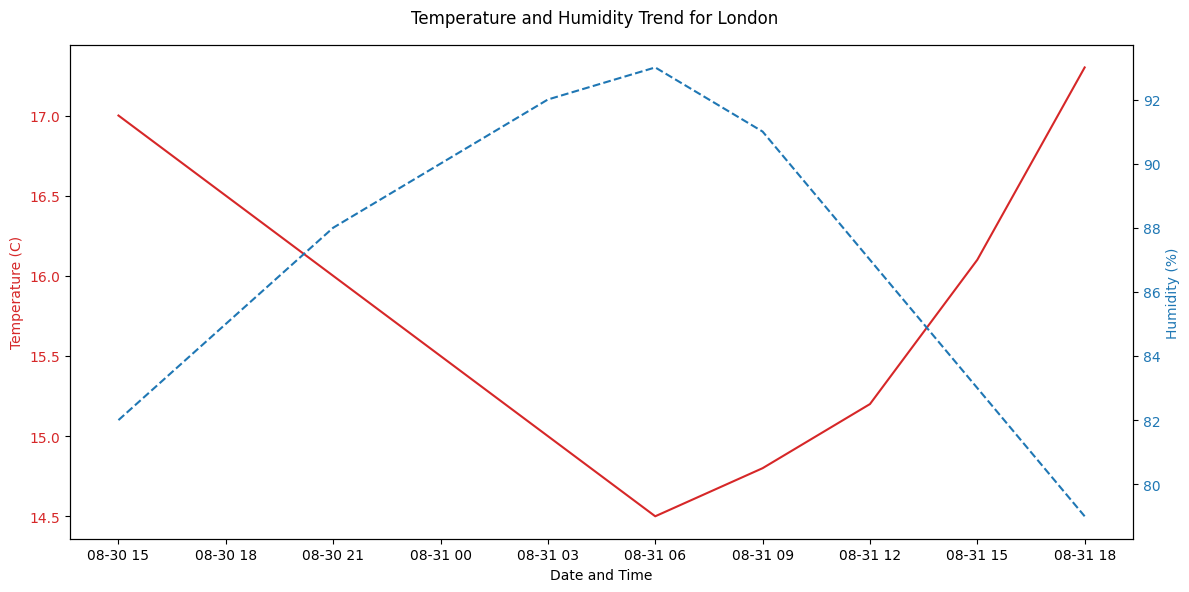

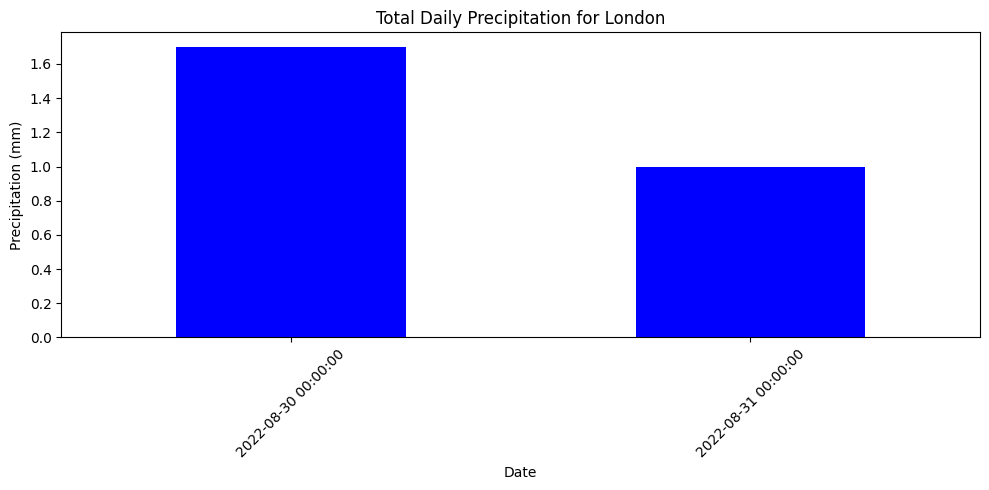

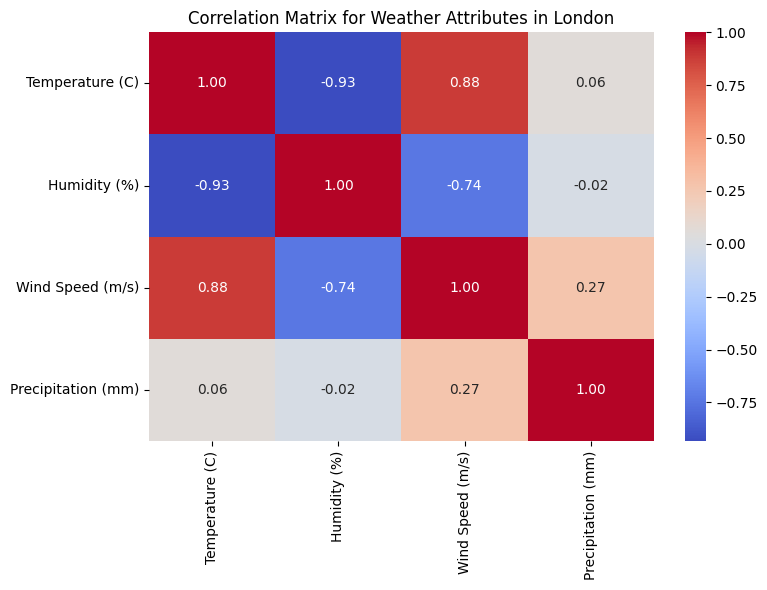

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

# --- Task 1: Enter Your API Key ---
# (Get your key from https://openweathermap.org/api)
API_KEY = ""

# --- Configuration ---
CITY_NAME = "London"
UNITS = "metric"  # Use 'metric' for Celsius, 'imperial' for Fahrenheit

# Set to True to run the script with sample data (no API key needed)
# Set to False to use the live OpenWeatherMap API
USE_MOCK_DATA = True

# Mock data (simulating the API response for "London")
# This is used if USE_MOCK_DATA is True
MOCK_DATA = {
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {"dt": 1661871600, "main": {"temp": 17.0, "humidity": 82}, "wind": {"speed": 4.63}, "rain": {"3h": 0.5}},
        {"dt": 1661882400, "main": {"temp": 16.5, "humidity": 85}, "wind": {"speed": 4.12}},
        {"dt": 1661893200, "main": {"temp": 16.0, "humidity": 88}, "wind": {"speed": 3.61}, "rain": {"3h": 1.2}},
        {"dt": 1661904000, "main": {"temp": 15.5, "humidity": 90}, "wind": {"speed": 3.10}},
        {"dt": 1661914800, "main": {"temp": 15.0, "humidity": 92}, "wind": {"speed": 2.59}, "rain": {"3h": 0.2}},
        {"dt": 1661925600, "main": {"temp": 14.5, "humidity": 93}, "wind": {"speed": 2.08}},
        {"dt": 1661936400, "main": {"temp": 14.8, "humidity": 91}, "wind": {"speed": 2.21}},
        {"dt": 1661947200, "main": {"temp": 15.2, "humidity": 87}, "wind": {"speed": 2.85}, "rain": {"3h": 0.8}},
        {"dt": 1661958000, "main": {"temp": 16.1, "humidity": 83}, "wind": {"speed": 3.12}},
        {"dt": 1661968800, "main": {"temp": 17.3, "humidity": 79}, "wind": {"speed": 3.55}},
    ],
    "city": {"id": 2643743, "name": "London", "coord": {"lat": 51.5074, "lon": -0.1278}, "country": "GB"}
}


def get_weather_data(api_key, city, units):
    """
    Task 2: Interact with the API to retrieve weather data.
    """
    if USE_MOCK_DATA:
        print("--- Using Mock Data ---")
        return MOCK_DATA

    print("--- Fetching Live Data from OpenWeatherMap ---")
    # Using the 5 day / 3 hour forecast API
    base_url = "https://api.openweathermap.org/data/2.5/forecast"
    params = {
        "q": city,
        "appid": api_key,
        "units": units
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Raises an HTTPError for bad responses (4xx or 5xx)
        return response.json()
    except requests.exceptions.HTTPError as err:
        if response.status_code == 401:
            print(f"Error: Invalid API Key. Please check your key.")
        else:
            print(f"HTTP Error: {err}")
    except requests.exceptions.RequestException as err:
        print(f"Request Error: {err}")

    return None

def process_data(data):
    """
    Tasks 3 & 4: Extract attributes, clean, and preprocess the data.
    """
    if not data or 'list' not in data:
        print("No forecast data found.")
        return None, None

    # Extract data for the DataFrame
    forecasts = []
    for item in data['list']:
        forecast = {
            "DateTime": datetime.fromtimestamp(item['dt']),
            "Temperature (C)": item['main']['temp'],
            "Humidity (%)": item['main']['humidity'],
            "Wind Speed (m/s)": item['wind']['speed'],
            # Handle missing 'rain' data
            "Precipitation (mm)": item.get('rain', {}).get('3h', 0)
        }
        forecasts.append(forecast)

    # Create a Pandas DataFrame
    df = pd.DataFrame(forecasts)

    # Set DateTime as the index (best for time-series analysis)
    df.set_index("DateTime", inplace=True)

    # Extract geographical info for Task 8
    geo_info = {
        "lat": data['city']['coord']['lat'],
        "lon": data['city']['coord']['lon'],
        "city_name": data['city']['name']
    }

    print("\n--- Data Preprocessing Complete ---")
    print(df.head())
    return df, geo_info

def analyze_and_aggregate(df):
    """
    Tasks 5 & 7: Perform data modeling and aggregation.
    """
    print("\n--- Task 5: Basic Data Analysis ---")
    print(df.describe())

    print("\n--- Task 7: Daily Aggregation ---")
    # Resample the 3-hour data into daily statistics
    daily_stats = df.resample('D').agg({
        "Temperature (C)": ['mean', 'max', 'min'],
        "Humidity (%)": ['mean'],
        "Precipitation (mm)": ['sum']
    })

    print("Daily Aggregated Weather Stats:")
    print(daily_stats)
    return daily_stats

def visualize_data(df, daily_stats):
    """
    Task 6: Visualize the weather data.
    """
    print("\n--- Task 6: Visualizing Data ---")

    # Plot 1: Temperature and Humidity over time (Line Chart)
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:red'
    ax1.set_xlabel('Date and Time')
    ax1.set_ylabel('Temperature (C)', color=color)
    ax1.plot(df.index, df['Temperature (C)'], color=color, label='Temperature')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # Instantiate a second y-axis
    color = 'tab:blue'
    ax2.set_ylabel('Humidity (%)', color=color)
    ax2.plot(df.index, df['Humidity (%)'], color=color, linestyle='--', label='Humidity')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.suptitle(f'Temperature and Humidity Trend for {CITY_NAME}')
    fig.tight_layout()
    plt.savefig('temperature_humidity.png')
    print("Saved 'temperature_humidity.png'")

    # Plot 2: Daily Precipitation (Bar Plot)
    plt.figure(figsize=(10, 5))
    daily_stats['Precipitation (mm)']['sum'].plot(kind='bar', color='blue')
    plt.title(f'Total Daily Precipitation for {CITY_NAME}')
    plt.ylabel('Precipitation (mm)')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('daily_precipitation.png')
    print("Saved 'daily_precipitation.png'")

def visualize_relationships(df):
    """
    Task 9: Explore and visualize relationships (Correlation Plot).
    """
    print("\n--- Task 9: Visualizing Relationships ---")

    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for Weather Attributes in {CITY_NAME}')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    print("Saved 'correlation_heatmap.png'")

def visualize_map(geo_info):
    """
    Task 8: Incorporate geographical information (Map).
    """
    if not geo_info:
        print("No geographical info to plot.")
        return

    print(f"\n--- Task 8: Creating Geographical Map ---")

    lat = geo_info['lat']
    lon = geo_info['lon']
    city = geo_info['city_name']

    # Create a map centered on the city
    m = folium.Map(location=[lat, lon], zoom_start=10)

    # Add a marker for the city
    folium.Marker(
        [lat, lon],
        popup=f"<b>{city}</b>",
        tooltip=city
    ).add_to(m)

    # Save the map to an HTML file
    m.save("weather_map.html")
    print("Saved 'weather_map.html'. Open this file in your browser.")


# --- Main execution ---
if __name__ == "__main__":
    # Check if API key is set when not using mock data
    if not USE_MOCK_DATA and API_KEY == "YOUR_API_KEY_HERE":
        print("Error: Please set your API_KEY in the script.")
    else:
        # Tasks 2
        weather_json = get_weather_data(API_KEY, CITY_NAME, UNITS)

        if weather_json:
            # Tasks 3 & 4
            weather_df, geo_info = process_data(weather_json)

            if weather_df is not None:
                # Tasks 5 & 7
                daily_df = analyze_and_aggregate(weather_df)

                # Task 6
                visualize_data(weather_df, daily_df)

                # Task 9
                visualize_relationships(weather_df)

                # Task 8
                visualize_map(geo_info)

                print("\n--- Analysis Complete ---")
                print("Generated 3 plot images and 1 map file.")

Assgnment 9<br>
Data Cleaning and Preparation
Problem Statement: Analyzing Customer Churn in a Telecommunications Company
Dataset: "Telecom_Customer_Churn.csv"
Description: The dataset contains information about customers of a telecommunications company and whether they have churned (i.e., discontinued their services). The dataset includes various attributes of the customers, such as their demographics, usage patterns, and account information. The goal is to perform data cleaning and preparation to gain insights into the factors that contribute to customer churn.
Tasks to Perform:
1. Import the "Telecom_Customer_Churn.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Handle missing values in the dataset, deciding on an appropriate strategy.
4. Remove any duplicate records from the dataset.
5. Check for inconsistent data, such as inconsistent formatting or spelling variations, and standardize it.
6. Convert columns to the correct data types as needed.
7. Identify and handle outliers in the data.
8. Perform feature engineering, creating new features that may be relevant to predicting customer churn.
9. Normalize or scale the data if necessary.
10. Split the dataset into training and testing sets for further analysis.
11. Export the cleaned dataset for future analysis or modeling.

In [ ]:
import pandas as pd
import numpy as np
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- Simulate the "Telecom_Customer_Churn.csv" file ---
# We create a mock CSV in memory to make this script runnable.
# It includes common data quality issues that we will clean.
csv_data = """customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5934.9,No
1212-GLHMD,Male,0,No,no,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.7,45.7,yes
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes
5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,E-check,105.5,2686.05,No
6565-YOLYY,Female,0,Yes,Yes,720,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),1000,73651.8,No
8665-UTGGF,Male,0,Yes,Yes,1,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,45.25,45.25,Yes
1111-NEVSU,Female,1,Yes,No,25,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,94.0,2343.3,No
2222-MYGNB,Female,0,No,Yes,,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Mailed check,62.9,2390.1,No
3333-MKOXR,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.6,8672.45,No
4444-MCHMG,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,61.45,633.3,No
5555-JASAF,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-check,74.5,934.35,Yes
"""
# ----------------------------------------------------

# In a real case, you would use this line instead of the code above:
# file_path = "Telecom_Customer_Churn.csv"
# df = pd.read_csv(file_path)

# Task 1: Import the dataset (from the simulated CSV data)
csv_file = io.StringIO(csv_data)
df = pd.read_csv(csv_file)5

# Task 2: Explore the dataset
print("--- 2. Initial Data Exploration ---")
print("Shape:", df.shape)
print("\nHead:\n", df.head())
print("\nInfo:")
df.info()
print("\nInitial Missing Values:\n", df.isnull().sum())
print("\nUnique 'Churn' values:", df['Churn'].unique())
print("Unique 'Dependents' values:", df['Dependents'].unique())

# Task 3: Handle missing values
print("\n--- 3. Handling Missing Values ---")
# 'TotalCharges' is object, has missing values. Convert to numeric, coercing errors.
# The mock data has a blank 'tenure' and 'TotalCharges' which pandas reads as NaN.
# 'TotalCharges' is often empty for new customers (low tenure). We'll convert to numeric.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Strategy 1: For 'TotalCharges', NaNs are likely new customers. Fill with 0.
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Strategy 2: For 'tenure', NaN is less common. We'll drop the row.
df.dropna(subset=['tenure'], inplace=True)

# Strategy 3: For 'Dependents', fill with the mode (most common value).
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

print("\nMissing Values After Handling:\n", df.isnull().sum())

# Task 4: Remove duplicate records
print("\n--- 4. Removing Duplicates ---")
print(f"Rows before duplicate removal: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Rows after duplicate removal: {len(df)}")

# Drop customerID, as it's an identifier and not a predictive feature
df.drop('customerID', axis=1, inplace=True)

# Task 5: Standardize inconsistent data
print("\n--- 5. Standardizing Inconsistent Data ---")
# 'Churn' has 'No', 'Yes', 'no', 'yes'
df['Churn'] = df['Churn'].str.title()
print("Cleaned 'Churn' values:", df['Churn'].unique())

# 'Dependents' has 'No', 'Yes', 'no'
df['Dependents'] = df['Dependents'].str.title()
print("Cleaned 'Dependents' values:", df['Dependents'].unique())

# 'PaymentMethod' has 'E-check' and 'Electronic check'
df['PaymentMethod'] = df['PaymentMethod'].replace('E-check', 'Electronic check')
print("Cleaned 'PaymentMethod' values:", df['PaymentMethod'].unique())

# Task 8: Perform feature engineering (Done *before* encoding)
print("\n--- 8. Feature Engineering ---")
# Create 'Total_Services' count
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# Count 'Yes' for services. 'No internet service' and 'No phone service' count as 0.
df['Total_Services'] = df[service_cols].apply(lambda row: (row == 'Yes').sum(), axis=1)

# Create 'Tenure_per_Charge'
# Add 1 to monthly charges to avoid division by zero
df['Tenure_per_Charge'] = df['tenure'] / (df['MonthlyCharges'] + 1)
print(df[['Total_Services', 'Tenure_per_Charge']].head())

# Task 6: Convert columns to correct data types (and Encoding)
print("\n--- 6. Converting Data Types and Encoding ---")
# Convert binary columns to 0/1
binary_map = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
df['gender'] = df['gender'].map(binary_map)
df['Partner'] = df['Partner'].map(binary_map)
df['Dependents'] = df['Dependents'].map(binary_map)
df['PhoneService'] = df['PhoneService'].map(binary_map)
df['PaperlessBilling'] = df['PaperlessBilling'].map(binary_map)
df['Churn'] = df['Churn'].map(binary_map)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

# One-Hot Encode multi-category columns
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nData types after conversion and encoding:")
df.info()

# Task 7: Identify and handle outliers
print("\n--- 7. Handling Outliers (Capping) ---")
# We'll use the IQR method to cap outliers in numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Total_Services', 'Tenure_per_Charge']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[col] = np.clip(df[col], lower_bound, upper_bound)

print("Outliers have been capped to the 1.5 * IQR range.")
print("\nData description after outlier capping:\n", df[numerical_cols].describe())

# Separate features (X) and target (y)
y = df['Churn']
X = df.drop('Churn', axis=1)

# Task 9: Normalize or scale the data
print("\n--- 9. Scaling Data (StandardScaler) ---")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
print(X_scaled_df.describe())

# Task 10: Split the dataset into training and testing sets
print("\n--- 10. Splitting Data (80/20 split) ---")
# We use stratify=y to ensure the proportion of churn is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"Churn proportion in y_train:\n{y_train.value_counts(normalize=True)}")

# Task 11: Export the cleaned dataset
print("\n--- 11. Exporting Cleaned Dataset ---")
# Create the final cleaned DataFrame (pre-split)
cleaned_df = X_scaled_df.copy()
cleaned_df['Churn'] = y.values # Add the target back

# Export to CSV
cleaned_df.to_csv('Telecom_Churn_Cleaned.csv', index=False)
print("Successfully exported 'Telecom_Churn_Cleaned.csv'")

--- 2. Initial Data Exploration ---
Shape: (24, 21)

Head:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No     1.0           No   
1  5575-GNVDE    Male              0      No         No    34.0          Yes   
2  3668-QPYBK    Male              0      No         No     2.0          Yes   
3  7795-CFOCW    Male              0      No         No    45.0           No   
4  9237-HQITU  Female              0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  

Assignment 10<br>
Data Wrangling
Problem Statement: Data Wrangling on Real Estate Market
Dataset: "RealEstate_Prices.csv"
Description: The dataset contains information about housing prices in a specific real estate market. It includes various attributes such as property characteristics, location, sale prices, and other relevant features. The goal is to perform data wrangling to gain insights into the factors influencing housing prices and prepare the dataset for further analysis or modeling.
Tasks to Perform:
1. Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces, special characters, or renaming them for clarity.
2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g., imputation or removal).
3. Perform data merging if additional datasets with relevant information are available (e.g., neighborhood demographics or nearby amenities).
4. Filter and subset the data based on specific criteria, such as a particular time period, property type, or location.
5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or label encoding) for further analysis.
6. Aggregate the data to calculate summary statistics or derived metrics such as average sale prices by neighborhood or property type.
7. Identify and handle outliers or extreme values in the data that may affect the analysis or modeling process.

In [ ]:
import pandas as pd
import numpy as np
import io

# --- 1. Simulate "RealEstate_Prices.csv" ---
# This file has messy column names, missing data, and outliers
csv_data = """Property ID,Location (Neighborhood),Property Type,Square Footage,Num Bedrooms,"Year Built","Sale Price"
1001,Downtown,Condo,850,2,2015,300000
1002,Suburbia,Single-Family,1600,3,1998,450000
1003,Uptown,Condo,1100,2,2010,380000
1004,Downtown,Apartment,,1,2005,250000
1005,Suburbia,Single-Family,1800,4,2005,510000
1006,Downtown,Condo,900,2,2015,310000
1007,Uptown,Townhouse,1300,3,2012,420000
1008,Suburbia,Single-Family,2100,4,2018,580000
1009,Downtown,Apartment,700,1,2005,260000
1010,Suburbia,,1900,4,2005,530000
1011,Uptown,Condo,3000,5,2018,15000000
"""

# --- 2. Simulate "Neighborhood_Amenities.csv" ---
# A second file to be merged
amenities_data = """Neighborhood,School_Rating,Park_Count,Crime_Rate
Downtown,7,5,0.45
Suburbia,9,12,0.20
Uptown,8,8,0.30
Rural,6,3,0.15
"""

# -------------------------------------------------------------
# ----------- DATA WRANGLING PIPELINE STARTS HERE -------------
# -------------------------------------------------------------

# Task 1: Import dataset and clean column names
# In a real case: df = pd.read_csv("RealEstate_Prices.csv")
df = pd.read_csv(io.StringIO(csv_data))
print("--- 1. Initial Column Names ---")
print(df.columns)

# Clean names: lowercase, replace spaces/special chars with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace(r'[^a-z0-9_]', '', regex=True)
print("\n--- 1. Cleaned Column Names ---")
print(df.columns)


# Task 2: Handle missing values
print("\n--- 2. Missing Values (Before) ---")
print(df.isnull().sum())

# Strategy 1: Impute numerical 'square_footage' with the median
median_sqft = df['square_footage'].median()
df['square_footage'] = df['square_footage'].fillna(median_sqft)

# Strategy 2: Impute categorical 'property_type' with the mode (most common)
mode_prop_type = df['property_type'].mode()[0]
df['property_type'] = df['property_type'].fillna(mode_prop_type)

print("\n--- 2. Missing Values (After) ---")
print(df.isnull().sum())


# Task 3: Perform data merging
# In a real case: amenities_df = pd.read_csv("Neighborhood_Amenities.csv")
amenities_df = pd.read_csv(io.StringIO(amenities_data))
amenities_df.columns = amenities_df.columns.str.lower() # Clean new df's columns too

print(f"\n--- 3. Merging Data ---")
print(f"Shape before merge: {df.shape}")

# Rename the 'neighborhood' column in amenities_df to match 'location_neighborhood' in df
amenities_df.rename(columns={'neighborhood': 'location_neighborhood'}, inplace=True)


# Perform a 'left' merge to keep all properties, even if they have no amenity data
df_merged = pd.merge(df, amenities_df, on='location_neighborhood', how='left')

print(f"Shape after merge: {df_merged.shape}")
print(df_merged.head())


# Task 7: Identify and handle outliers (Best done before aggregation)
print(f"\n--- 7. Handling Outliers ---")
print("Sale Price statistics (Before):")
print(df_merged['sale_price'].describe())

# Strategy: Cap extreme values using the IQR (Interquartile Range) method
Q1 = df_merged['sale_price'].quantile(0.25)
Q3 = df_merged['sale_price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# Cap the values
df_merged['sale_price_capped'] = np.clip(df_merged['sale_price'], lower_bound, upper_bound)

print("\nSale Price statistics (After capping):")
print(df_merged[['sale_price', 'sale_price_capped']].describe())
# Note the original 'sale_price' (max 15M) vs 'sale_price_capped' (max ~685k)


# Task 4: Filter and subset the data
print(f"\n--- 4. Filtering Data ---")
# Criteria: Single-Family homes built after 2000
filtered_df = df_merged[
    (df_merged['property_type'] == 'Single-Family') &
    (df_merged['year_built'] > 2000)
].copy() # .copy() avoids a SettingWithCopyWarning

print("Filtered subset (Single-Family, built > 2000):")
print(filtered_df[['property_id', 'location_neighborhood', 'property_type', 'year_built', 'sale_price']])


# Task 6: Aggregate the data
print(f"\n--- 6. Aggregating Data ---")
# Calculate summary statistics by neighborhood
# We use the original 'sale_price' here to show the impact of the outlier
agg_stats = df_merged.groupby('location_neighborhood').agg(
    Average_Price=('sale_price', 'mean'),
    Average_Price_Capped=('sale_price_capped', 'mean'),
    Median_SqFt=('square_footage', 'median'),
    Average_School_Rating=('school_rating', 'mean'),
    Property_Count=('property_id', 'count')
).reset_index()

print("Average stats by neighborhood:")
print(agg_stats.to_string())
# Note the huge difference between Average_Price and Average_Price_Capped for 'Uptown'


# Task 5: Handle categorical variables
print(f"\n--- 5. Encoding Categorical Variables ---")
# We will create a new DataFrame for a "model-ready" state
# We use the capped price and drop the original
model_df = df_merged.drop(['sale_price', 'property_id'], axis=1).copy()

# Identify categorical columns for encoding
categorical_cols = ['location_neighborhood', 'property_type']

# Strategy: One-Hot Encoding
# drop_first=True helps prevent multicollinearity in linear models
model_df_encoded = pd.get_dummies(model_df, columns=categorical_cols, drop_first=True)

print("DataFrame head after One-Hot Encoding:")
print(model_df_encoded.head())
print("\nNew columns created by encoding:")
print(model_df_encoded.columns)

--- 1. Initial Column Names ---
Index(['Property ID', 'Location (Neighborhood)', 'Property Type',
       'Square Footage', 'Num Bedrooms', 'Year Built', 'Sale Price'],
      dtype='object')

--- 1. Cleaned Column Names ---
Index(['property_id', 'location_neighborhood', 'property_type',
       'square_footage', 'num_bedrooms', 'year_built', 'sale_price'],
      dtype='object')

--- 2. Missing Values (Before) ---
property_id              0
location_neighborhood    0
property_type            1
square_footage           1
num_bedrooms             0
year_built               0
sale_price               0
dtype: int64

--- 2. Missing Values (After) ---
property_id              0
location_neighborhood    0
property_type            0
square_footage           0
num_bedrooms             0
year_built               0
sale_price               0
dtype: int64

--- 3. Merging Data ---
Shape before merge: (11, 7)
Shape after merge: (11, 10)
   property_id location_neighborhood  property_type  square_foota

Assignment 11<br>
Data Visualization using matplotlib
Problem Statement: Analyzing Air Quality Index (AQI) Trends in a City
Dataset: "City_Air_Quality.csv"
Description: The dataset contains information about air quality measurements in a specific city over a period of time. It includes attributes such as date, time, pollutant levels (e.g., PM2.5, PM10, CO), and the Air Quality Index (AQI) values. The goal is to use the matplotlib library to create visualizations that effectively represent the AQI trends and patterns for different pollutants in the city.
Tasks to Perform:
1. Import the "City_Air_Quality.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant levels, and AQI values.
4. Create line plots or time series plots to visualize the overall AQI trend over time.
5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to visualize their trends over time.
6. Use bar plots or stacked bar plots to compare the AQI values across different dates or time periods.
7. Create box plots or violin plots to analyze the distribution of AQI values for different pollutant categories.
8. Use scatter plots or bubble charts to explore the relationship between AQI values and pollutant levels.
9. Customize the visualizations by adding labels, titles, legends, and appropriate color schemes.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import io

# --- Simulate the "City_Air_Quality.csv" file ---
# We create a mock CSV in memory to make this script runnable.
# It contains 14 days of hourly data.
dates = pd.date_range('2023-01-01', periods=14 * 24, freq='H')
data = {
    "Date": dates.date,
    "Time": dates.time,
    "PM2.5": np.abs(np.random.normal(30, 15, len(dates))) + np.sin(np.arange(len(dates)) * 0.1) * 10,
    "PM10": np.abs(np.random.normal(50, 20, len(dates))) + np.sin(np.arange(len(dates)) * 0.1) * 15,
    "CO": np.abs(np.random.normal(0.8, 0.3, len(dates))),
    "AQI": np.abs(np.random.normal(70, 25, len(dates))) + np.sin(np.arange(len(dates)) * 0.1) * 20
}
# Add some missing values
df_mock = pd.DataFrame(data)
df_mock.loc[df_mock.sample(frac=0.05).index, 'PM2.5'] = np.nan
df_mock.loc[df_mock.sample(frac=0.05).index, 'AQI'] = np.nan

csv_data = df_mock.to_csv(index=False)
# ----------------------------------------------------

# In a real case, you would use this line instead of the code above:
# file_path = "City_Air_Quality.csv"
# df = pd.read_csv(file_path)

# Task 1: Import the dataset (from the simulated CSV data)
csv_file = io.StringIO(csv_data)
df = pd.read_csv(csv_file)

# Task 2: Explore the dataset
print("--- 2. Initial Data Exploration ---")
print("Shape:", df.shape)
print("\nHead:\n", df.head())
print("\nInfo:")
df.info()

# --- Data Preparation ---
# Task 3: Identify variables and preprocess
print("\n--- 3. Preprocessing Data ---")
# Combine Date and Time into a single 'DateTime' index
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('DateTime', inplace=True)

# Handle missing values (e.g., forward fill for time-series)
df.fillna(method='ffill', inplace=True)
print("Missing values handled.")
print(df.describe())

# Relevant variables are: df.index (time), 'PM2.5', 'PM10', 'CO', 'AQI'

# Task 4: Create line plot for overall AQI trend
print("\n--- 4. Creating AQI Trend Line Plot ---")
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AQI'], label='AQI', color='red', linewidth=2)
plt.title('Overall Air Quality Index (AQI) Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('aqi_trend.png')
plt.close()
print("Saved 'aqi_trend.png'")

# Task 5: Plot individual pollutant trends (using subplots)
print("--- 5. Creating Individual Pollutant Line Plots ---")
pollutants = ['PM2.5', 'PM10', 'CO']
colors = ['blue', 'green', 'purple']
y_labels = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'CO (ppm)']

# Create a figure with 3 subplots, sharing the x-axis
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

for ax, poll, color, label in zip(axes, pollutants, colors, y_labels):
    ax.plot(df.index, df[poll], label=poll, color=color)
    ax.set_ylabel(label, fontsize=10)
    ax.legend(loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.5)

# Add common labels and title
fig.suptitle('Individual Pollutant Trends Over Time', fontsize=18)
axes[-1].set_xlabel('Date', fontsize=12) # Set x-label only on the bottom plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
plt.savefig('pollutant_trends.png')
plt.close()
print("Saved 'pollutant_trends.png'")

# Task 6: Use bar plot to compare AQI values
print("--- 6. Creating Daily Average AQI Bar Plot ---")
# Aggregate data to daily averages for a clearer bar plot
daily_aqi = df['AQI'].resample('D').mean()

plt.figure(figsize=(12, 6))
plt.bar(daily_aqi.index, daily_aqi.values, color='teal', width=0.7)
plt.title('Average Daily AQI Comparison', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average AQI Value', fontsize=12)

# Format x-axis to show dates clearly
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('daily_aqi_bar.png')
plt.close()
print("Saved 'daily_aqi_bar.png'")

# Task 7: Create box plots for pollutant distributions
print("--- 7. Creating Pollutant Distribution Box Plots ---")
data_to_plot = [df['AQI'], df['PM2.5'], df['PM10'], df['CO']]
labels = ['AQI', 'PM2.5', 'PM10', 'CO']

# We use subplots because the scales are very different
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

axes[0].boxplot(df['AQI'].dropna())
axes[0].set_title('AQI Distribution', fontsize=14)
axes[0].set_ylabel('AQI Value', fontsize=12)

axes[1].boxplot(df['PM2.5'].dropna())
axes[1].set_title('PM2.5 Distribution', fontsize=14)
axes[1].set_ylabel('PM2.5 (µg/m³)', fontsize=12)

axes[2].boxplot(df['PM10'].dropna())
axes[2].set_title('PM10 Distribution', fontsize=14)
axes[2].set_ylabel('PM10 (µg/m³)', fontsize=12)

axes[3].boxplot(df['CO'].dropna())
axes[3].set_title('CO Distribution', fontsize=14)
axes[3].set_ylabel('CO (ppm)', fontsize=12)

fig.suptitle('Distribution of AQI and Key Pollutants', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.savefig('pollutant_boxplots.png')
plt.close()
print("Saved 'pollutant_boxplots.png'")

# Task 8: Use scatter plot to explore relationships
print("--- 8. Creating AQI vs. PM2.5 Scatter Plot ---")
plt.figure(figsize=(10, 6))
# 'alpha' is used to show density in case of overplotting
plt.scatter(df['PM2.5'], df['AQI'], alpha=0.5, color='orange', s=15)
plt.title('Relationship between PM2.5 and AQI', fontsize=16)
plt.xlabel('PM2.5 (µg/m³)', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('scatter_pm25_aqi.png')
plt.close()
print("Saved 'scatter_pm25_aqi.png'")

# Task 9: Customization was performed in all plots above.
print("\n--- All visualizations saved as .png files in the current directory. ---")

/tmp/ipython-input-2631174619.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range('2023-01-01', periods=14 * 24, freq='H')
/tmp/ipython-input-2631174619.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


--- 2. Initial Data Exploration ---
Shape: (336, 6)

Head:
          Date      Time      PM2.5       PM10        CO         AQI
0  2023-01-01  00:00:00  14.443712  12.779105  1.066932   75.556854
1  2023-01-01  01:00:00  39.834552  67.421269  0.800675   83.470241
2  2023-01-01  02:00:00  56.798204  44.605056  0.465716         NaN
3  2023-01-01  03:00:00  51.337354  53.773731  0.644171   44.689994
4  2023-01-01  04:00:00  40.128619  88.107750  1.034264  101.474823

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    336 non-null    object 
 1   Time    336 non-null    object 
 2   PM2.5   319 non-null    float64
 3   PM10    336 non-null    float64
 4   CO      336 non-null    float64
 5   AQI     319 non-null    float64
dtypes: float64(4), object(2)
memory usage: 15.9+ KB

--- 3. Preprocessing Data ---
Missing values handled.
            PM2.5

Assignment 12<br>
Data Aggregation
Problem Statement: Analyzing Sales Performance by Region in a Retail Company
Dataset: "Retail_Sales_Data.csv"
Description: The dataset contains information about sales transactions in a retail company. It includes attributes such as transaction date, product category, quantity sold, and sales amount. The goal is to perform data aggregation to analyze the sales performance by region and identify the top-performing regions.
Tasks to Perform:
1. Import the "Retail_Sales_Data.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for aggregating sales data, such as region, sales amount, and product category.
4. Group the sales data by region and calculate the total sales amount for each region.
5. Create bar plots or pie charts to visualize the sales distribution by region.
6. Identify the top-performing regions based on the highest sales amount.
7. Group the sales data by region and product category to calculate the total sales amount for each combination.
8. Create stacked bar plots or grouped bar plots to compare the sales amounts across different regions and product categories.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import io

file_path = "/content/sales_data - sales_data.csv"
df = pd.read_csv(file_path)

print("--- 2. Initial Data Exploration ---")
print("Shape:", df.shape)
print("\nHead:\n", df.head())
print("\nInfo:")
df.info()

print("\n--- 3. Identifying Relevant Variables ---")
print("The key variables for this analysis are 'Region', 'ProductCategory', and 'SalesAmount'.")

# Task 4: Group sales data by region
print("\n--- 4. Total Sales by Region ---")

regional_sales = df.groupby('Region')['TotalAmount'].sum()

regional_sales = regional_sales.sort_values(ascending=False)
print(regional_sales)

# Task 5: Visualize sales distribution by region
print("\n--- 5. Visualizing Regional Sales ---")

# --- Bar Plot ---
plt.figure(figsize=(10, 6))
regional_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('regional_sales_bar.png')
plt.close()
print("Saved 'regional_sales_bar.png'")

# --- Pie Chart ---
plt.figure(figsize=(8, 8))
regional_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Sales Distribution by Region', fontsize=16)
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.savefig('regional_sales_pie.png')
plt.close()
print("Saved 'regional_sales_pie.png'")

# Task 6: Identify top-performing regions
print("\n--- 6. Identifying Top-Performing Regions ---")
top_region = regional_sales.index[0]
top_sales = regional_sales.iloc[0]
print(f"The top-performing region is '{top_region}' with ${top_sales:,.2f} in sales.")

# Task 7: Group sales by region and product category
print("\n--- 7. Total Sales by Region and Product Category ---")
# Group by both columns
region_category_sales = df.groupby(['Region', 'Category'])['TotalAmount'].sum()

# Use unstack() to pivot the data into a DataFrame suitable for plotting
# (Rows=Region, Columns=ProductCategory)
region_category_df = region_category_sales.unstack(fill_value=0)
print(region_category_df)

# Task 8: Create stacked and grouped bar plots
print("\n--- 8. Visualizing Region and Category Sales ---")

# --- Stacked Bar Plot ---
plt.figure(figsize=(12, 7))
region_category_df.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Stacked Sales by Region and Product Category', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.tight_layout()
plt.savefig('stacked_sales_by_region_category.png')
plt.close()
print("Saved 'stacked_sales_by_region_category.png'")

# --- Grouped Bar Plot ---
plt.figure(figsize=(12, 7))
region_category_df.plot(kind='bar', stacked=False, figsize=(12, 7))
plt.title('Grouped Sales by Region and Product Category', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.tight_layout()
plt.savefig('grouped_sales_by_region_category.png')
plt.close()
print("Saved 'grouped_sales_by_region_category.png'")

print("\n--- Analysis Complete ---")

--- 2. Initial Data Exploration ---
Shape: (10, 9)

Head:
    OrderID        Date CustomerName       Product     Category  Quantity  \
0     1001  2024-07-01     John Doe        Laptop  Electronics       1.0   
1     1002  2024-07-02  Alice Smith    Smartphone  Electronics       2.0   
2     1003  2024-07-03      Bob Lee  Office Chair    Furniture       1.0   
3     1004  2024-07-04   Ravi Patel      Notebook   Stationery      10.0   
4     1005  2024-07-05  Priya Kumar     Desk Lamp  Electronics       2.0   

   UnitPrice  TotalAmount Region  
0    60000.0      60000.0  North  
1    25000.0      50000.0   West  
2     8000.0       8000.0  South  
3       50.0        500.0   East  
4     1200.0       2400.0  North  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       10 non-null     int64  
 1   Date          10 non-null     ob

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

Assignment 13<br>
Time Series Data Analysis
Problem statement: Analysis and Visualization of Stock Market Data
Dataset: "Stock_Prices.csv"
Description: The dataset contains historical stock price data for a particular company over a period of time. It includes attributes such as date, closing price, volume, and other relevant features. The goal is to perform time series data analysis on the stock price data to identify trends, patterns, and potential predictors, as well as build models to forecast future stock prices.
Tasks to Perform:
1. Import the "Stock_Prices.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Ensure that the date column is in the appropriate format (e.g., datetime) for time series analysis.
4. Plot line charts or time series plots to visualize the historical stock price trends over time.
5. Calculate and plot moving averages or rolling averages to identify the underlying trends and smooth out noise.
6. Perform seasonality analysis to identify periodic patterns in the stock prices, such as weekly, monthly, or yearly fluctuations.
7. Analyze and plot the correlation between the stock prices and other variables, such as trading volume or market indices.
8. Use autoregressive integrated moving average (ARIMA) models or exponential smoothing models to forecast future stock prices.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings from statsmodels
warnings.filterwarnings("ignore")

dates = pd.date_range('2022-01-01', periods=500, freq='B') # 'B' = Business Day
n = len(dates)

# Create a random walk with a slight upward trend
trend = np.linspace(0, 20, n)
price_noise = np.random.randn(n).cumsum()
price = 100 + price_noise + trend
price = np.round(price, 2)

# Create volume data
volume = np.random.randint(1_000_000, 5_000_000, n)
# Make volume slightly correlated with price changes
volume[1:] = volume[1:] + (np.abs(np.diff(price)) * 100_000).astype(int)

# Create DataFrame
df_mock = pd.DataFrame({'Date': dates, 'Close': price, 'Volume': volume})
# Add some missing values
df_mock.loc[df_mock.sample(frac=0.02).index, 'Close'] = np.nan
df_mock.loc[df_mock.sample(frac=0.01).index, 'Volume'] = np.nan

csv_data = df_mock.to_csv(index=False)
# ----------------------------------------------------

# In a real case, you would use this line instead of the code above:
# file_path = "Stock_Prices.csv"
# df = pd.read_csv(file_path)

# Task 1: Import the dataset
csv_file = io.StringIO(csv_data)
df = pd.read_csv(csv_file)

# Task 2: Explore the dataset
print("--- 2. Initial Data Exploration ---")
print("Shape:", df.shape)
print("\nHead:\n", df.head())
print("\nInfo:")
df.info()

# --- Data Preprocessing ---
print("\n--- 3. Preprocessing Data ---")
# Task 3: Ensure date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Handle missing values (common in time-series)
# Forward-fill: assumes the value is the same as the previous day's
df.fillna(method='ffill', inplace=True)
print("\nMissing values filled.")
print(df.describe())

# Task 4: Plot historical stock price trends
print("\n--- 4. Plotting Historical Trend ---")
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Historical Stock Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price ($)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('stock_price_trend.png')
plt.close()
print("Saved 'stock_price_trend.png'")

# Task 5: Calculate and plot moving averages
print("\n--- 5. Plotting Moving Averages ---")
# Calculate 20-day (short-term) and 50-day (long-term) moving averages
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['MA_20'], label='20-Day Moving Average', color='orange', linewidth=2)
plt.plot(df['MA_50'], label='50-Day Moving Average', color='red', linewidth=2)
plt.title('Stock Price with 20-Day and 50-Day Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price ($)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('stock_price_moving_averages.png')
plt.close()
print("Saved 'stock_price_moving_averages.png'")

# Task 6: Perform seasonality analysis
print("\n--- 6. Performing Seasonality Analysis ---")
# We use seasonal_decompose. A 'period' of 21 is common for
# monthly seasonality in daily business data (approx. 21 trading days/month).
decomposition = seasonal_decompose(df['Close'], model='additive', period=21)

fig = decomposition.plot()
fig.set_size_inches(12, 10)
fig.suptitle('Time Series Decomposition (Trend, Seasonality, Residuals)', y=1.02)
plt.tight_layout()
plt.savefig('stock_price_decomposition.png')
plt.close()
print("Saved 'stock_price_decomposition.png'")

# Task 7: Analyze and plot correlation
print("\n--- 7. Analyzing Correlation ---")
# Analyze correlation between Close price and Volume
correlation_matrix = df[['Close', 'Volume']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Plot the correlation heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Close Price vs. Volume', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.close()
print("Saved 'correlation_heatmap.png'")

# Task 8: Use ARIMA model to forecast
print("\n--- 8. Forecasting with ARIMA ---")
# We'll use a simple ARIMA(p,d,q) model
# (1,1,1) is a common baseline:
# p=1: Autoregressive part, uses 1 previous observation
# d=1: Integrated part, data is differenced 1 time (to make it stationary)
# q=1: Moving Average part, uses 1 past forecast error
model = ARIMA(df['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 30 business days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for the forecast
forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast_series = pd.Series(forecast, index=forecast_dates)

print("\nARIMA Model Summary:")
print(model_fit.summary())

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Close'].tail(100), label='Historical Data (Last 100 Days)') # Plot last 100 days
plt.plot(forecast_series, label='Forecast (Next 30 Days)', color='red', linestyle='--')
plt.title('Stock Price Forecast using ARIMA(1,1,1)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price ($)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('stock_price_forecast.png')
plt.close()
print("Saved 'stock_price_forecast.png'")

print("\n--- All tasks complete. ---")

--- 2. Initial Data Exploration ---
Shape: (500, 3)

Head:
          Date   Close     Volume
0  2022-01-03   99.86  4635573.0
1  2022-01-04   99.75  4679911.0
2  2022-01-05  100.31  3648310.0
3  2022-01-06   98.19  2393410.0
4  2022-01-07   99.03  3266940.0

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    500 non-null    object 
 1   Close   490 non-null    float64
 2   Volume  495 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.8+ KB

--- 3. Preprocessing Data ---

Missing values filled.
           Close        Volume
count  500.00000  5.000000e+02
mean   105.23326  3.061918e+06
std      6.82017  1.161629e+06
min     90.30000  1.060781e+06
25%    100.09250  2.089468e+06
50%    106.41000  3.011875e+06
75%    110.60500  4.056564e+06
max    117.52000  5.433327e+06

--- 4. Plotting Historical Trend ---
Saved 'stock_price_tr

In [ ]:
#7th assignment

import pandas as pd
import numpy as np

csv_data = """Date,ProductID,Amount,Region
2024-01-01,P100,150,North
2024-01-02,P101,200,South
2024-01-03,P100,150,North
2024-01-04,P102,500,West """

json_data = """[
    {"Date": "2024-01-01", "ProductID": "P100", "Amount": 150, "Region": "North"},
    {"Date": "2024-01-02", "ProductID": "P101", "Amount": 200, "Region": "South"},
    {"Date": "2024-01-03", "ProductID": "P100", "Amount": 300, "Region": "North"},
    {"Date": "2024-01-04", "ProductID": "P102", "Amount": 500, "Region": "West"}
]"""

df_csv = pd.read_csv('csv_data.csv')
df_json = pd.read_json('json_data.json')
#df_excel = pd.read_excel('excel_data.xlsv')




FileNotFoundError: [Errno 2] No such file or directory: 'csv_data.csv'

In [ ]:
# Assignment 9 - Data Cleaning and Preparation
# Author: Ishita

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️⃣ Load Dataset
df = pd.read_csv("Telecom_Customer_Churn.csv")
print("✅ Data Loaded Successfully!\n")

# 2️⃣ Explore the Data
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# 3️⃣ Handle Missing Values
df = df.fillna(df.median(numeric_only=True))  # numeric columns → median
df = df.fillna("Unknown")                     # categorical columns → "Unknown"

# 4️⃣ Remove Duplicates
df = df.drop_duplicates()

# 5️⃣ Fix Inconsistent Data
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].str.strip().str.lower().replace({'male':'Male', 'female':'Female'})

# 6️⃣ Convert Data Types
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 7️⃣ Handle Outliers (simple example using capping)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df[col] = df[col].clip(df[col].quantile(0.01), df[col].quantile(0.99))

# 8️⃣ Feature Engineering (example: create new feature)
if {'Tenure', 'MonthlyCharges'}.issubset(df.columns):
    df['AvgMonthlySpend'] = df['TotalCharges'] / (df['Tenure'] + 1)

# 9️⃣ Normalize / Scale numeric data
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 🔟 Split into Training and Testing Sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print("\n✅ Data Split into Train and Test Sets!")

# 1️⃣1️⃣ Export Cleaned Dataset
df.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)
print("\n✅ Cleaned dataset exported successfully!")


FileNotFoundError: [Errno 2] No such file or directory: 'Telecom_Customer_Churn.csv'